# How to actually build a neural network from blocks?

The webinar is a part of the [Intel Software Student Developer Program for AI](https://software.intel.com/en-us/experts/ambassadors).

## Webinar

* sign up: https://www.crowdcast.io/e/neural-network-blocks/register (6 July 2017)
* speaker: Jakub Czakon, moderator: Dr. Piotr Migdał

## Installation

* Python 3 with Jupyter Notebook and respective libraries (the easiest way is with [Anaconda distribution](https://www.continuum.io/downloads)).
* [Keras](https://keras.io/) (2.x) with [TensorFlow](https://www.tensorflow.org/) backend.
* [keras-sequential-ascii](https://github.com/stared/keras-sequential-ascii) for diagrams

```bash
$ pip install tensorflow
$ pip install keras
$ pip install git+git://github.com/stared/keras-sequential-ascii.git
$ wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
```

## Data

Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.

## More info

For additional information, including [some context for notMNIST](http://p.migdal.pl/2017/04/30/teaching-deep-learning.html#notmnist), see [Learning Deep Learning with Keras](http://p.migdal.pl/2017/04/30/teaching-deep-learning.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from scipy import io
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras_sequential_ascii import sequential_model_to_ascii_printout
from live_loss_plot import PlotLosses

# Keras layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, GlobalMaxPool2D

Using TensorFlow backend.


In [2]:
# load data
data = io.loadmat("../resources/notMNIST_small.mat")

# transform data
X = data['images']
y = data['labels']
resolution = 28
classes = 10

X = np.transpose(X, (2, 0, 1))

y = y.astype('int32')
X = X.astype('float32') / 255.

# channel for X
X = X.reshape((-1, resolution, resolution, 1))

# 3 -> [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
Y = np_utils.to_categorical(y, 10)

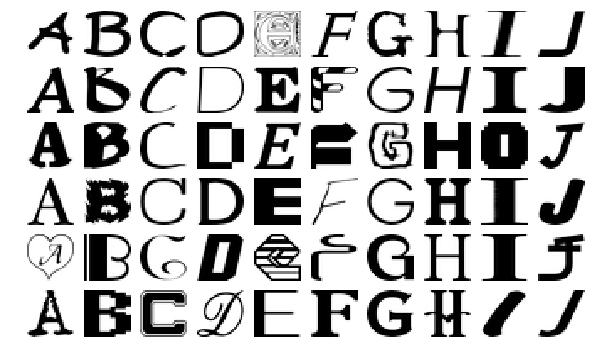

In [3]:
# random letters
rows = 6
fig, axs = plt.subplots(rows, classes, figsize=(classes, rows))
for letter_id in range(10):
    letters = X[y == letter_id]
    for i in range(rows):
        ax = axs[i, letter_id]
        ax.imshow(letters[np.random.randint(len(letters)),:,:,0],
                  cmap='Greys', interpolation='none')
        ax.axis('off')

In [4]:
# splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=137)

In [5]:
plot_losses = PlotLosses(figsize=(8, 4))

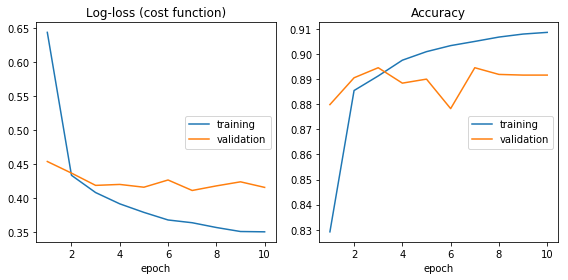

14979/14979 [==============================] - 1s - loss: 0.3510 - acc: 0.9086 - val_loss: 0.4162 - val_acc: 0.8916
CPU times: user 19.9 s, sys: 7.75 s, total: 27.6 s
Wall time: 13.3 s


In [6]:
%%time
# logistic regression
model = Sequential()

model.add(Flatten(input_shape=(resolution, resolution, 1)))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

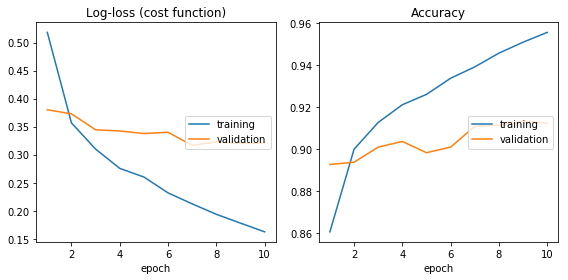

14979/14979 [==============================] - 1s - loss: 0.1623 - acc: 0.9555 - val_loss: 0.3208 - val_acc: 0.9124
CPU times: user 30.3 s, sys: 9.73 s, total: 40.1 s
Wall time: 17.2 s


In [7]:
%%time
# MLP
model = Sequential()

model.add(Flatten(input_shape=(resolution, resolution, 1)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

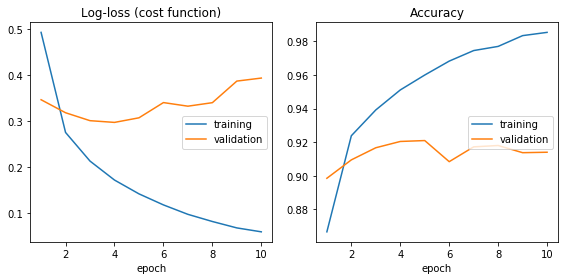

14979/14979 [==============================] - 4s - loss: 0.0598 - acc: 0.9853 - val_loss: 0.3937 - val_acc: 0.9140
CPU times: user 2min 51s, sys: 33.6 s, total: 3min 25s
Wall time: 49.8 s


In [8]:
%%time
# 1 conv
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

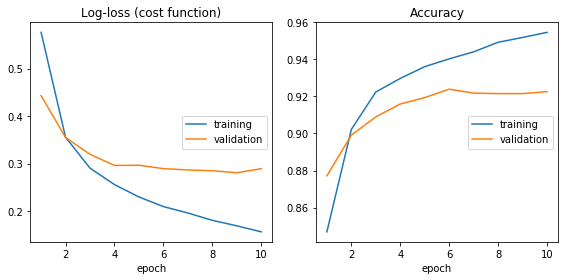

14979/14979 [==============================] - 4s - loss: 0.1563 - acc: 0.9545 - val_loss: 0.2893 - val_acc: 0.9226
CPU times: user 2min 24s, sys: 32 s, total: 2min 56s
Wall time: 44.3 s


In [9]:
%%time
# 1 conv + max pool
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

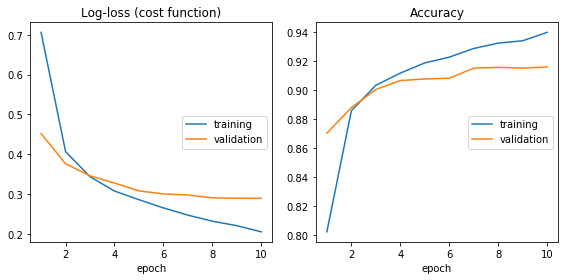

14979/14979 [==============================] - 6s - loss: 0.2049 - acc: 0.9400 - val_loss: 0.2890 - val_acc: 0.9162
CPU times: user 4min 55s, sys: 2min 57s, total: 7min 52s
Wall time: 1min 9s


In [10]:
%%time
# 2x (conv + max pool)
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

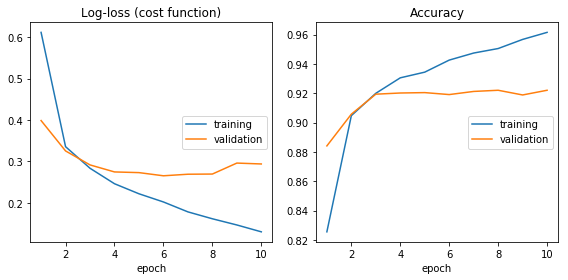

14979/14979 [==============================] - 15s - loss: 0.1296 - acc: 0.9615 - val_loss: 0.2936 - val_acc: 0.9220
CPU times: user 21min 33s, sys: 8min 38s, total: 30min 12s
Wall time: 2min 42s


In [11]:
%%time
# 2x (conv + max pool) more channels
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

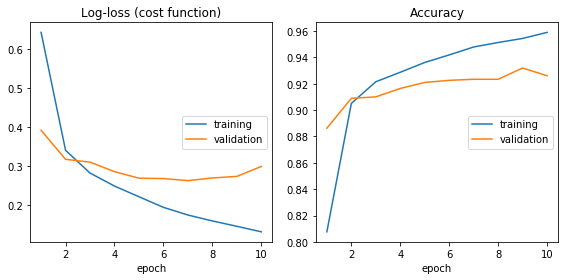

14979/14979 [==============================] - 14s - loss: 0.1315 - acc: 0.9589 - val_loss: 0.2994 - val_acc: 0.9260
CPU times: user 14min 45s, sys: 10min 26s, total: 25min 12s
Wall time: 2min 30s


In [12]:
%%time
# 2x (2xconv + max pool)
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

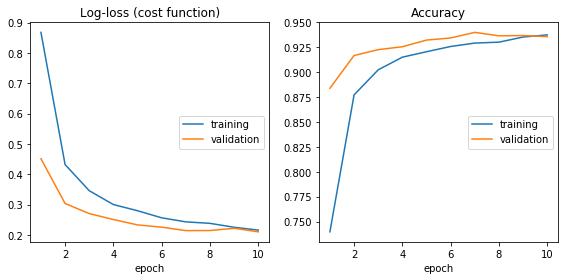

14979/14979 [==============================] - 19s - loss: 0.2155 - acc: 0.9374 - val_loss: 0.2098 - val_acc: 0.9356
CPU times: user 23min 38s, sys: 10min 35s, total: 34min 14s
Wall time: 3min 17s


In [13]:
%%time
# 2x (2xconv + max pool) dropout bn
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

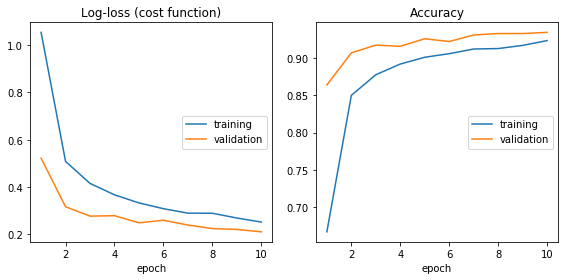

14979/14979 [==============================] - 19s - loss: 0.2519 - acc: 0.9233 - val_loss: 0.2106 - val_acc: 0.9343
CPU times: user 23min 59s, sys: 10min 43s, total: 34min 42s
Wall time: 3min 21s


In [14]:
%%time
# 2x (2xconv + max pool + dense) dropout bn
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

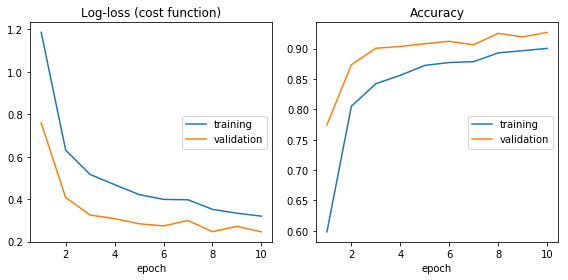

14979/14979 [==============================] - 20s - loss: 0.3198 - acc: 0.9004 - val_loss: 0.2458 - val_acc: 0.9268
CPU times: user 24min 9s, sys: 10min 43s, total: 34min 52s
Wall time: 3min 22s


In [15]:
%%time
# fully conv
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(resolution, resolution, 1)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(GlobalMaxPool2D())

model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
sequential_model_to_ascii_printout(model)

# train model
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, Y_test), callbacks=[plot_losses])

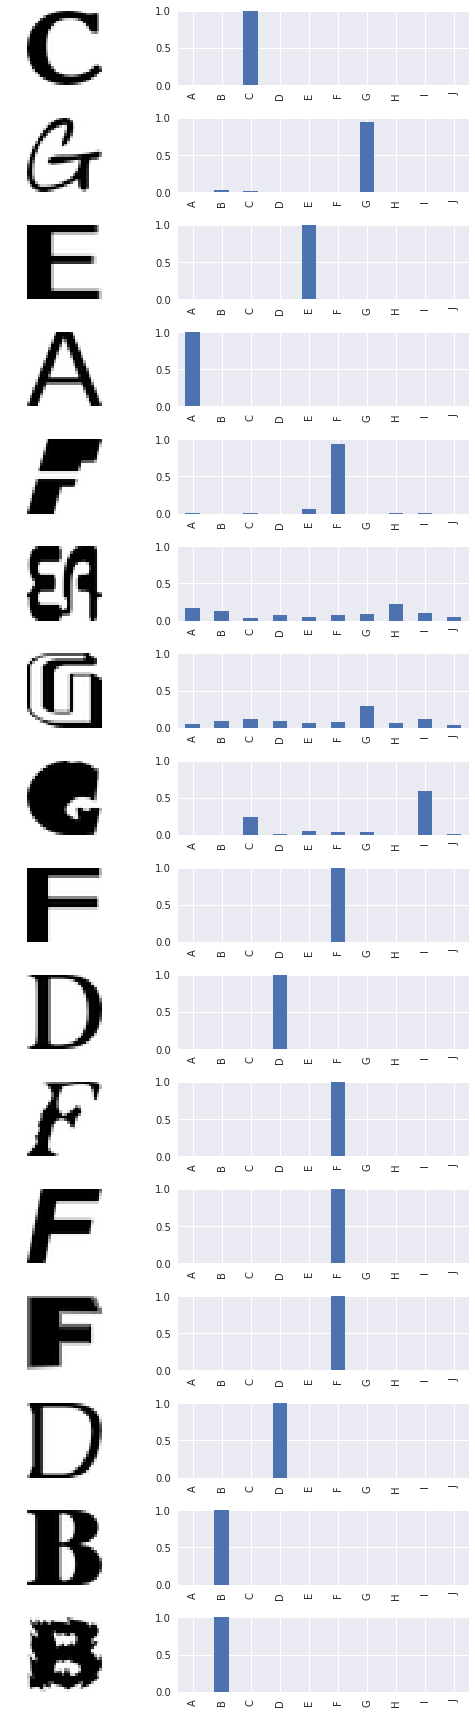

In [21]:
# example predictions
predictions = model.predict(X_test)

rows = 16
fig, axs = plt.subplots(rows, 2, figsize=(8, 1.5 * rows))
for i in range(rows):
    ax = axs[i,0]
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx,:,:,0],
              cmap='Greys', interpolation='none')
    ax.axis('off')
        
    pd.Series(predictions[idx], index=list("ABCDEFGHIJ")).plot('bar', ax=axs[i,1], ylim=[0,1])

plt.tight_layout()

# Bonus: Grid Plots

/home/jakub.czakon/.webinar/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/jakub.czakon/.webinar/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


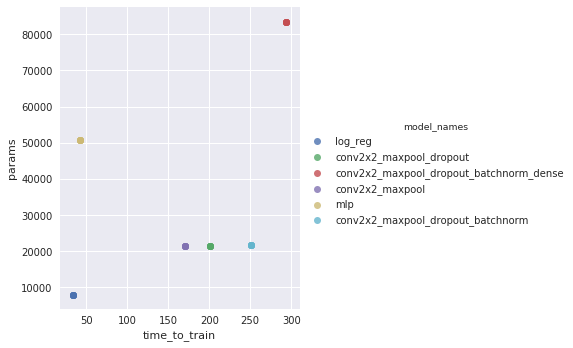

In [17]:
from grid_plot import plot_complexity, plot_grid
# choose models by name or don't pass anything if you want to see all trained models
MY_MODELS = ['log_reg', 'mlp', 
             'conv2x2_maxpool',
             'conv2x2_maxpool_dropout', 'conv2x2_maxpool_dropout_batchnorm',      
              'conv2x2_maxpool_dropout_batchnorm_dense']
plot_complexity(models=MY_MODELS, save_path='../resources/model_grid_scores.csv');

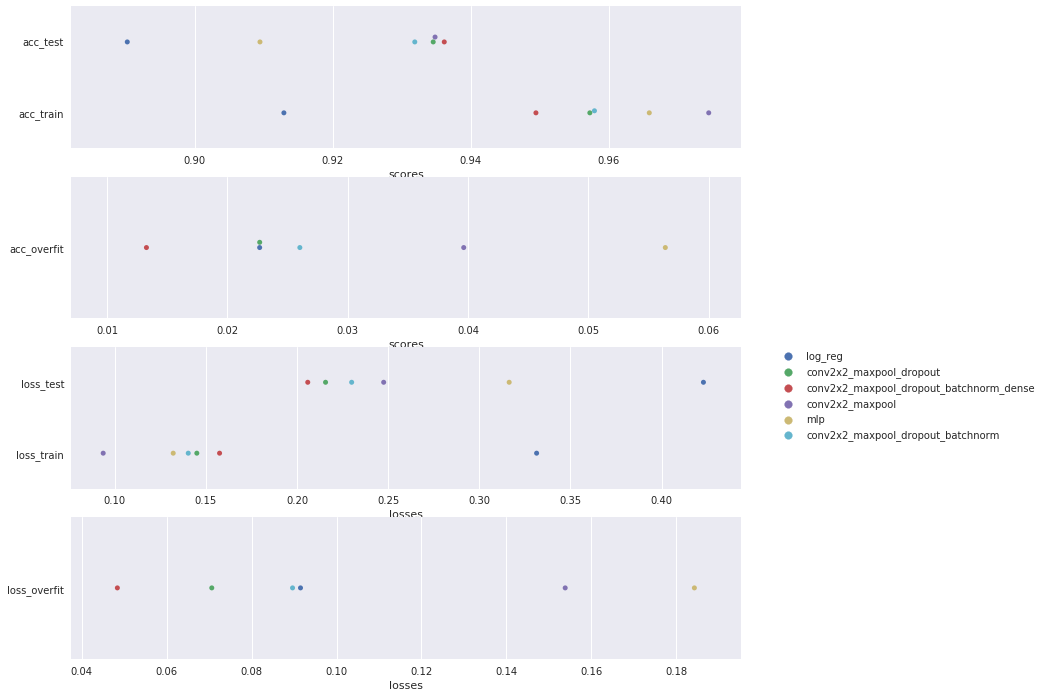

In [18]:
plot_grid(models=MY_MODELS, save_path='../resources/model_grid_scores.csv');

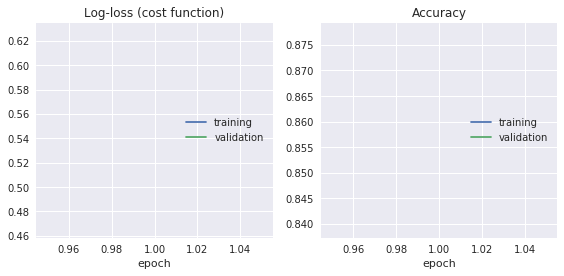

3712/3745 [============================>.] - ETA: 0s

,acc_test,acc_train,loss_test,loss_train,model_names,params,time_to_train,acc_overfit,loss_overfit
0,0.891322,0.900461,0.384732,0.357705,mlp,50890,2,0.009139,0.027027
1,0.897997,0.923560,0.345559,0.282952,conv1,108330,5,0.025562,0.062607
2,0.877437,0.878163,0.466309,0.452815,log_reg,7850,1,0.000726,0.013494


In [19]:
from grid_plot import train_models_and_format_grid
grid = train_models_and_format_grid(X_train, Y_train, X_test, Y_test, plot_losses, epochs=1)
grid.to_csv('../resources/example_grid.csv', index=None)
grid

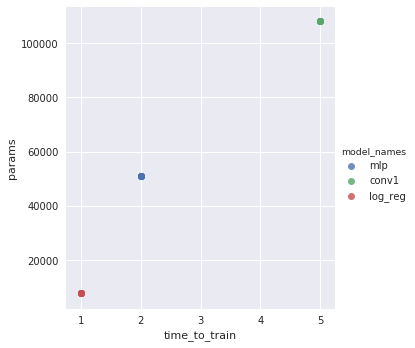

In [22]:
plot_complexity(save_path='../resources/example_grid.csv');

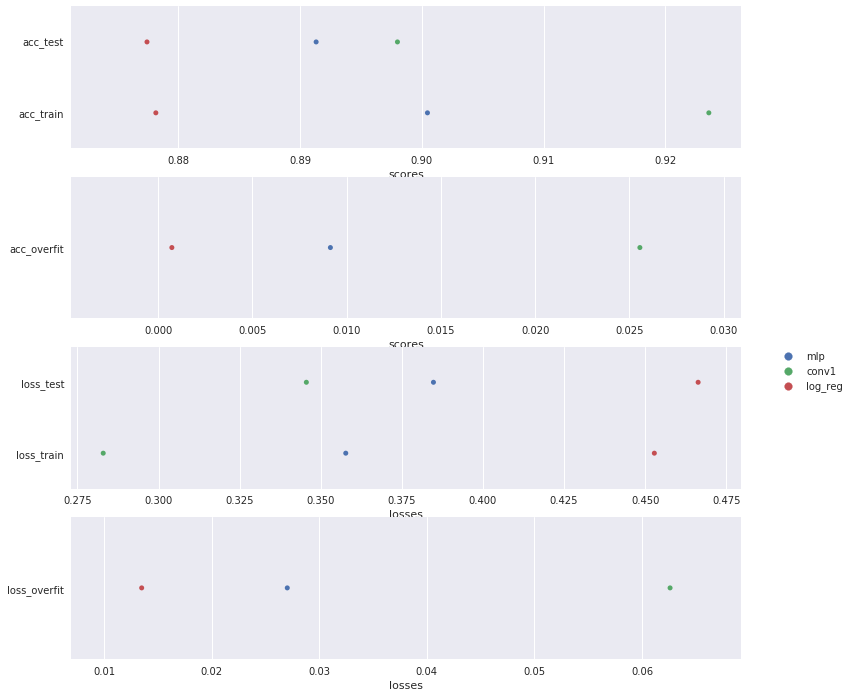

In [23]:
plot_grid(save_path='../resources/example_grid.csv');